## PyTorch-ANN

Lets make a basic **PyTorch** ANN. Simple example of a classification problem using an **ANN** in **PyTorch**.

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

We will be training an ANN to do classification on the coverage type datastet from UCI

https://archive.ics.uci.edu/ml/datasets/Covertype

In [2]:
#Read data for analysis
data=pd.read_csv('../data/cov/covtype.csv')

In [3]:
print('Data Dimension:')
print('Number of Records:', data.shape[0])
print('Number of Features:', data.shape[1])

Data Dimension:
Number of Records: 581012
Number of Features: 55


In [4]:
#Names of columns
print('Feature Names')
print(data.columns)

Feature Names
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39'

In [5]:
#Let's check for missing values once again
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


We don't seem to be missing any data

In [6]:
#distribution of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


Wilderness and soil type seems to be one hot encoded. Every other data type is continuous.

In [7]:
cont_variables = ['Elevation',
                'Aspect', 
                'Slope',
                'Horizontal_Distance_To_Hydrology',
                'Vertical_Distance_To_Hydrology',
                'Horizontal_Distance_To_Roadways',
                'Hillshade_9am',
                'Hillshade_Noon',
                'Hillshade_3pm',
                'Horizontal_Distance_To_Fire_Points']


In [8]:
#Split the data in train test split
from sklearn.model_selection import train_test_split

X = data.drop('Cover_Type',axis=1)
y = data['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
#Lets scale the continous variables
from sklearn.preprocessing import StandardScaler

X_train_cont = X_train[cont_variables]
X_test_cont = X_test[cont_variables]

X_train_cat = X_train.drop(cont_variables, axis=1)
X_test_cat = X_test.drop(cont_variables, axis=1)

sc = StandardScaler()
sc.fit(X_train_cont)
X_train_cont_std = sc.transform(X_train_cont)
X_test_cont_std = sc.transform(X_test_cont)

X_train_std = np.hstack((X_train_cont_std, X_train_cat))
X_test_std = np.hstack((X_test_cont_std, X_test_cat))


In [10]:
#Lets apply multiclass logistic regression to get a baseline model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, tol=0.1)
lr.fit(X_train_std, y_train)

print(f"Train score={lr.score(X_train_std,  y_train):.2}")
print(f"Test score={lr.score(X_test_std,  y_test):.2}")

/Users/jamieott/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score=0.72
Test score=0.72


In [11]:
#Lets fit a single decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=2)
clf = clf.fit(X_train_std, y_train)
print(f"Train score={clf.score(X_train_std, y_train):.2}")
print(f"Test score={clf.score(X_test_std, y_test):.2}")

Train score=1.0
Test score=0.94


Decision tree has a very good Train score and a decent test score.

In [12]:
#Now lets fit random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, min_samples_split=2)
clf.fit(X_train_std, y_train)
print(f"Train score={clf.score(X_train_std, y_train):.3}")
print(f"Test score={clf.score(X_test_std, y_test):.3}")

Train score=1.0
Test score=0.956


**Random Forest** has a good test set performance, better than decision trees.

Now lets train a deep neural network on this

In [13]:
#Convert X and y to tensors
X_train_std_t = torch.tensor(X_train_std, dtype=torch.float)
y_train_t = torch.LongTensor(y_train.values-1)

X_test_std_t = torch.tensor(X_test_std, dtype=torch.float)
y_test_t = torch.LongTensor(y_test.values-1)

In [14]:
#Lets create a Model
class ANNModel(nn.Module):
    def __init__(self, n_sz, out_sz, layers ):
        #Call the base class constructor
        super().__init__()
        #Create a list of layers
        layerlist = []
        for i in layers:
            #Append a linear layer
            layerlist.append(nn.Linear(n_sz,i))
            #Append a ReLU layer
            layerlist.append(nn.ReLU(inplace=True))
            n_sz = i
        #Append a final layer
        layerlist.append(nn.Linear(layers[-1],out_sz)) 
        #Make it a sequential model
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x):
        #Forward propogate on all the layers
        x = self.layers(x)
        return x

In [15]:
torch.manual_seed(33)
model = ANNModel(X_train_std_t.shape[1], 7, [108, 54]) #Two hidden layers with 108 and 54 neurons

In [16]:
print(model)

ANNModel(
  (layers): Sequential(
    (0): Linear(in_features=54, out_features=108, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=108, out_features=54, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=54, out_features=7, bias=True)
  )
)


In [17]:
#Lets count the number of paramaters in the model
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [18]:
count_parameters(model)

  5832
   108
  5832
    54
   378
     7
______
 12211


In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [20]:
epochs = 1000
train_losses = []
test_losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train_std_t)
    train_loss = criterion(y_pred, y_train_t)
    train_losses.append(train_loss)
    
    # Run the test data
    with torch.no_grad():
        # Apply the model
        y_val = model(X_test_std_t)  
    
    # Update test loss for the epoch
    test_loss = criterion(y_val, y_test_t)
    test_losses.append(test_loss)
    
    if i%10 == 1:
        print(f'epoch: {i:2}  test_loss: {test_loss.item():10.8f} train_loss: {train_loss.item():10.8f}')

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch:  1  test_loss: 1.97033072 train_loss: 1.96927989
epoch: 11  test_loss: 0.94927710 train_loss: 0.94388771
epoch: 21  test_loss: 0.70946580 train_loss: 0.70742738
epoch: 31  test_loss: 0.65042937 train_loss: 0.64616144
epoch: 41  test_loss: 0.61071390 train_loss: 0.60417801
epoch: 51  test_loss: 0.57642019 train_loss: 0.57008249
epoch: 61  test_loss: 0.54861385 train_loss: 0.54277080
epoch: 71  test_loss: 0.52625346 train_loss: 0.51984859
epoch: 81  test_loss: 0.56361049 train_loss: 0.55694836
epoch: 91  test_loss: 0.49627721 train_loss: 0.48981529
epoch: 101  test_loss: 0.47105059 train_loss: 0.46360540
epoch: 111  test_loss: 0.45572060 train_loss: 0.44780514
epoch: 121  test_loss: 0.48197445 train_loss: 0.47448581
epoch: 131  test_loss: 0.44282836 train_loss: 0.43485460
epoch: 141  test_loss: 0.42586297 train_loss: 0.41731796
epoch: 151  test_loss: 0.43178836 train_loss: 0.42237738
epoch: 161  test_loss: 0.43104276 train_loss: 0.42329010
epoch: 171  test_loss: 0.40950549 train_l

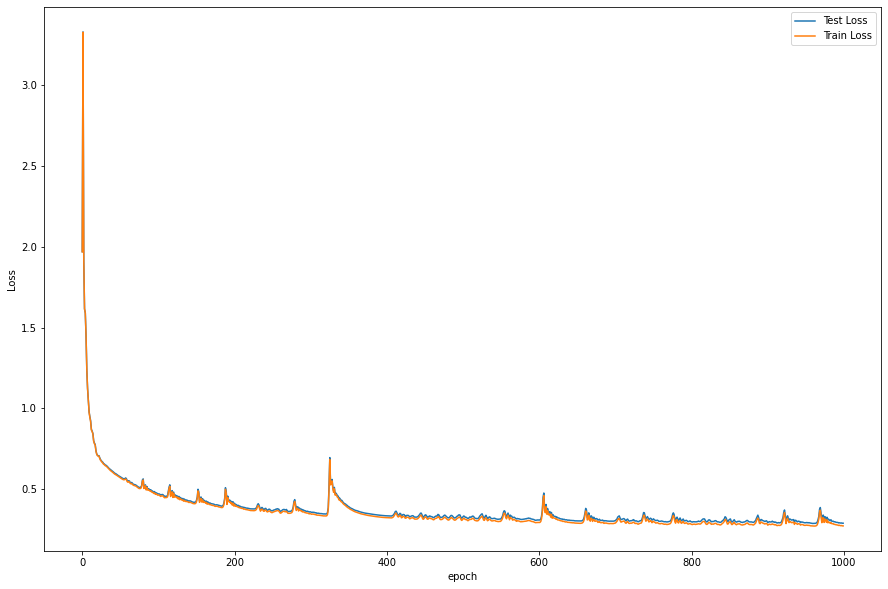

In [21]:
plt.figure(figsize=(15,10))
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()

In [22]:
#evaluate final test and train set predictions
with torch.no_grad():
    y_train_pred = model(X_train_std_t) 
    train_pred = torch.max(y_train_pred,1)[1]
    
    y_test_pred = model(X_test_std_t)
    test_pred = torch.max(y_test_pred,1)[1]

#Lets measure train and test set accuracy
from sklearn.metrics import accuracy_score
print(f"Train accuracy={accuracy_score(y_train_t.numpy(), train_pred):0.3}")
print(f"Test accuracy={accuracy_score(y_test_t.numpy(), test_pred):0.3}")

Train accuracy=0.89
Test accuracy=0.884


In the above example ANN didn't beat Random Forest. One can potentially increase the size of the network, it seems to be a high bias situation where the train and test error both are pretty high.